# Random Forest With Grid Search

In [261]:
# third party
import matplotlib.pyplot as plot
import numpy
import pandas
import seaborn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [262]:
%matplotlib inline
seaborn.set_style("whitegrid")

In [263]:
titanic_data = pandas.read_csv("training_cleaned.csv")
titanic_data.describe()

         Survived      Pclass       SibSp       Parch        Fare      Gender  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.523008    0.381594   32.204208    0.647587   
std      0.486592    0.836071    1.102743    0.806057   49.693429    0.477990   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000    0.000000    7.910400    0.000000   
50%      0.000000    3.000000    0.000000    0.000000   14.454200    1.000000   
75%      1.000000    3.000000    1.000000    0.000000   31.000000    1.000000   
max      1.000000    3.000000    8.000000    6.000000  512.329200    1.000000   

          AgeFill  EmbarkedCode  FamilySize   AgeXClass  
count  891.000000    891.000000  891.000000  891.000000  
mean    29.112424      0.361392    0.904602   62.614860  
std     13.304424      0.635673    1.613459   31.362024  
min      0.420000      0.000000    0.0

In [264]:
target = titanic_data.Survived.values
training_data = titanic_data[titanic_data.columns[1:]].values

In [265]:
testing_frame = pandas.read_csv("testing_cleaned.csv")
testing_frame.describe()

           Pclass       SibSp       Parch        Fare      Gender     AgeFill  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean     2.277482    0.466477    0.411453   35.561065    0.653080   29.232028   
std      0.886436    0.969366    1.049192   55.856863    0.600794   12.909225   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.170000   
25%      1.000000    0.000000    0.000000    7.895800    0.000000   21.500000   
50%      3.000000    0.000000    0.000000   14.454200    1.000000   25.000000   
75%      3.000000    1.000000    0.000000   31.471875    1.000000   36.000000   
max      7.987500    8.000000    9.000000  512.329200    7.987500   76.000000   

       EmbarkedCode  FamilySize   AgeXClass  
count    418.000000  418.000000  418.000000  
mean       0.483224    0.877931   60.517656  
std        0.777679    1.689310   25.936672  
min        0.000000    0.000000    0.510000  
25%        0.000000    0.000000   43.125

In [266]:
testing_data = testing_frame.values

In [267]:
estimators = range(10, 110, 10)
features = range(1, len(titanic_data.columns))
model = RandomForestClassifier()
classifier = GridSearchCV(estimator=model,
                          param_grid=dict(n_estimators=estimators, max_features=features),
                          n_jobs=-1)

There should be 10 x 9 (90) cells in our grid. By default it uses 3-fold cross validation and setting ``n_jobs=-1`` tells it to run processes in parallel (for computers with multiple cores available).

In [268]:
%timeit classifier.fit(training_data, target)

1 loop, best of 3: 21.8 s per loop


In [269]:
results = pandas.DataFrame(classifier.cv_results_)

In [270]:
results.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_max_features', 'param_n_estimators',
       'params', 'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'std_fit_time', 'std_score_time',
       'std_test_score', 'std_train_score'],
      dtype='object')

In [271]:
results.mean_fit_time.median() + results.mean_score_time.median()

0.14006141821543375

In [272]:
results.mean_test_score.describe()

count    90.000000
mean      0.804140
std       0.006325
min       0.785634
25%       0.801347
50%       0.805836
75%       0.808081
max       0.817059
Name: mean_test_score, dtype: float64

The best model hit around 81% of the testing data.

In [273]:
results.mean_train_score.describe()

count    90.000000
mean      0.982903
std       0.004641
min       0.965208
25%       0.983726
50%       0.984848
75%       0.985410
max       0.985410
Name: mean_train_score, dtype: float64

The best model on the training data was 99% accurate - much better than the default model.

In [274]:
best = results[results.rank_test_score == results.rank_test_score.min()]

In [275]:
best.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_max_features', 'param_n_estimators',
       'params', 'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'std_fit_time', 'std_score_time',
       'std_test_score', 'std_train_score'],
      dtype='object')

In [276]:
best.params

49    {'n_estimators': 100, 'max_features': 5}
Name: params, dtype: object

In [277]:
mean = best.mean_test_score
std = best.std_test_score

In [278]:
print("95% confidence interval: ({0:.2f}, {1:.2f})".format((mean - std).values[0],
                                                           (mean + std).values[0]))

95% confidence interval: (0.79, 0.84)


In [279]:
best.mean_train_score

49    0.984848
Name: mean_train_score, dtype: float64

The best model on the test data was not the model that did best on the training data (which had a 99% accuracy rate on the training data) so there might be some overfitting going on.

In [280]:
best.params

49    {'n_estimators': 100, 'max_features': 5}
Name: params, dtype: object

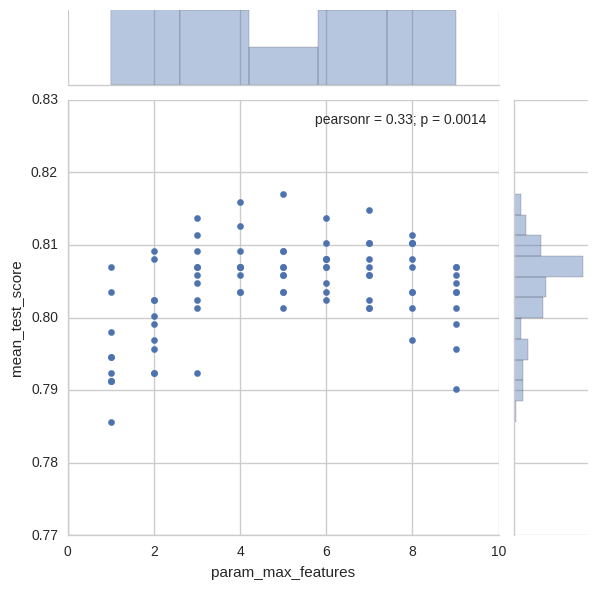

In [281]:
grid = seaborn.jointplot(x="param_max_features", y="mean_test_score", data=results)

In [282]:
best.param_max_features

49    5
Name: param_max_features, dtype: object

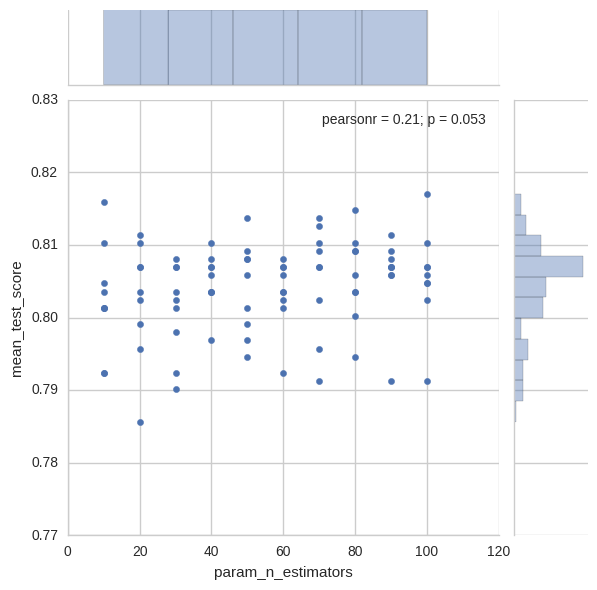

In [283]:
grid = seaborn.jointplot(x="param_n_estimators", y="mean_test_score", data=results)

In [284]:
best.param_n_estimators

49    100
Name: param_n_estimators, dtype: object

In this case our best model had 7 features and 50 estimators (Decision Trees). Since the number of features is discrete I assume that the 7 chosen are optimal.

In [285]:
len(classifier.best_estimator_.estimators_)

100

## grid search 7 features

Since 7 seems to be the best number of features to have, perhaps we should search the number of estimators instead.

In [286]:
classifier = GridSearchCV(estimator=model,
param_grid=dict(n_estimators=range(50, 100), max_features=(7,)))

In [287]:
%timeit classifier.fit(training_data, target)

1 loop, best of 3: 30.4 s per loop


In [288]:
results = pandas.DataFrame(classifier.cv_results_)

In [289]:
best = results[results.rank_test_score == results.rank_test_score.min()]

In [290]:
best

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
34       0.193129         0.011201         0.814815           0.98541   

   param_max_features param_n_estimators  \
34                  7                 84   

                                     params  rank_test_score  \
34  {'n_estimators': 84, 'max_features': 7}                1   

    split0_test_score  split0_train_score  split1_test_score  \
34           0.801347            0.991582           0.838384   

    split1_train_score  split2_test_score  split2_train_score  std_fit_time  \
34            0.983165           0.804714            0.981481      0.002549   

    std_score_time  std_test_score  std_train_score  
34        0.000097        0.016722         0.004419  

In [291]:
mean = best.mean_test_score
std = best.std_test_score
print("95% confidence interval: ({0:.2f}, {1:.2f})".format((mean - std).values[0],
                                                           (mean + std).values[0]))

95% confidence interval: (0.80, 0.83)


In [292]:
best.mean_train_score

34    0.98541
Name: mean_train_score, dtype: float64

In [293]:
best.params

34    {'n_estimators': 84, 'max_features': 7}
Name: params, dtype: object

In [294]:
classifier.best_estimator_.n_estimators

84

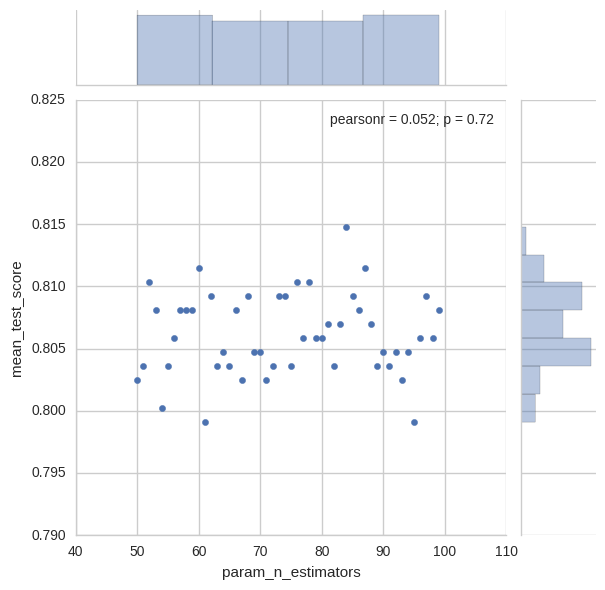

In [295]:
grid = seaborn.jointplot(x="param_n_estimators", y="mean_test_score", data=results)

# Kaggle

In [296]:
output = classifier.best_estimator_.predict(testing_data)

In [297]:
unclean = pandas.read_csv('test.csv')
output_data = pandas.DataFrame({"PassengerId": unclean.PassengerId, "Survived": output})
# if you upload floats the tester will mark them all wrong
output_data = output_data.astype(int)

In [298]:
output_data.to_csv("forest_model_grid_search.csv", index=False)

In [299]:
! head forest_model_grid_search.csv

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1


This model scored a 74.6% score, which is about the same as the previous entry....

In [300]:
classifier.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=84, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Even with the 'master' age in fill the score did not change.